In [1]:
### Process dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pandas as pd

%matplotlib inline

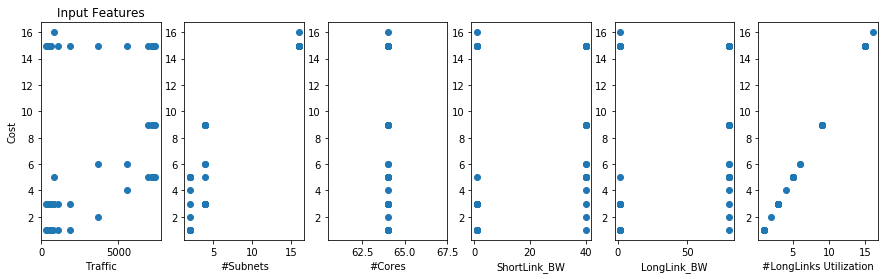

In [2]:
data = pd.read_csv('data/mixed_data.txt', sep=",", header=None)
df = pd.DataFrame(data)
X = df[df.columns[:5]]
y = df[df.columns[5]]

plt.figure(figsize=(15, 4))
features = ['Traffic', '#Subnets', '#Cores', 'ShortLink_BW', 'LongLink_BW', '#LongLinks Utilization']
for i, col in enumerate(df.columns):
    plt.subplot(1, 6, i+1)
    plt.plot(data[col], y, 'o')
    plt.xlabel(features[col])
    if i==0:
        plt.ylabel('Cost')
        plt.title("Input Features")


In [3]:
min_cost = np.min(y)
max_cost = np.max(y)
mean_cost = np.mean(y)
median_cost = np.median(y)
std_cost = np.std(y)

min_traffic = np.min(X[0])
max_traffic = np.max(X[0])
mean_traffic = np.mean(X[0])
median_traffic = np.median(X[0])
std_traffic = np.std(X[0])

print('Min cost: ', min_cost)
print('Max cost: ', max_cost)
print('Mean cost: ', mean_cost)
print('Median cost: ', median_cost)
print('Std cost: ', std_cost)
print('#')
print('Min traffic: ', min_traffic)
print('Max traffic: ', max_traffic)
print('Mean traffic: ', mean_traffic)
print('Median traffic: ', median_traffic)
print('Std traffic: ', std_traffic)


Min cost:  1
Max cost:  16
Mean cost:  7.777777777777778
Median cost:  5.0
Std cost:  5.597177419175525
#
Min traffic:  321
Max traffic:  7377
Mean traffic:  3417.8888888888887
Median traffic:  1822.0
Std traffic:  2990.1545573002095


In [4]:
"""Calculating the coefficient of determination, R2, 
to quantify your model's performance. The coefficient of determination 
for a model is a useful statistic in regression analysis, 
as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of 
squared correlation between the predicted and actual values of the 
target variable. A model with an R2 of 0 is no better than a model 
that always predicts the mean of the target variable, whereas a model 
with an R2 of 1 perfectly predicts the target variable. 
Any value between 0 and 1 indicates what percentage of the 
target variable, using this model, can be explained by the features.
A model can be given a negative R2 as well, which indicates that 
the model is arbitrarily worse than one that always predicts 
the mean of the target variable."""

from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    return score


In [5]:
# data normalization http://scikit-learn.org/stable/modules/preprocessing.html
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_test)
print(y_test)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# scaler1 = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)


       0   1   2   3   4
6   7337   2  64  40  80
17   481   4  64   1   2
19   351   2  64   1   2
29   593   2  64   1   2
38   321   2  64   1   2
44   807  16  64   1   2
5   6886   2  64  40  80
25   481  16  64   1   2
27  1822   2  64  40  80
6      5
17     3
19     1
29     1
38     1
44    16
5      5
25    15
27     1
Name: 5, dtype: int64


In [6]:
# cross-validation 
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

from sklearn.model_selection import KFold

# DecisionTreeRegressor
print('DecisionTree Regressor')
def fit_model_dt(X, y):
    cv_sets = KFold(n_splits=10)
    regressor = DecisionTreeRegressor(random_state=0)
    params = {'max_depth' : range(1,10)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)
    grid = grid.fit(X, y)
    return grid.best_estimator_

clf_dt = fit_model_dt(X_train, y_train)
train_acc_dt = clf_dt.score(X_train, y_train)
test_acc_dt = clf_dt.score(X_test, y_test)
y_pred_dt = clf_dt.predict(X_test)
print('train acc: ', train_acc_dt)
print('test acc: ', test_acc_dt)
print(X_test)
print(y_pred_dt)
print('R^2 score: ', performance_metric(y_test, y_pred_dt))


DecisionTree Regressor


/Users/tungthanhle/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


train acc:  0.9937143459217003
test acc:  0.9912443310657595
[[ 1.21025933 -0.94250988  0.          0.84515425  0.84515425]
 [-1.09806769 -0.61936364  0.         -1.18321596 -1.18321596]
 [-1.14183702 -0.94250988  0.         -1.18321596 -1.18321596]
 [-1.06035873 -0.94250988  0.         -1.18321596 -1.18321596]
 [-1.15193763 -0.94250988  0.         -1.18321596 -1.18321596]
 [-0.98830769  1.31951383  0.         -1.18321596 -1.18321596]
 [ 1.05841343 -0.94250988  0.          0.84515425  0.84515425]
 [-1.09806769  1.31951383  0.         -1.18321596 -1.18321596]
 [-0.64657024 -0.94250988  0.          0.84515425  0.84515425]]
[ 5.          3.28571429  1.6         1.6         1.6        15.
  5.         15.          1.6       ]
R^2 score:  0.9912443310657596


In [7]:
# RandomForestClassifier
print('RandomForest Classifier')
def fit_model_rf(X, y):
    cv_sets = KFold(n_splits=10)
    regressor = RandomForestClassifier(random_state=0)
    params = {'max_depth' : range(1,10)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)
    grid = grid.fit(X, y)
    return grid.best_estimator_

clf_rf = fit_model_rf(X_train, y_train)
train_acc_rf = clf_rf.score(X_train, y_train)
test_acc_rf = clf_rf.score(X_test, y_test)
y_pred_rf = clf_rf.predict(X_test)
print('train acc: ', train_acc_rf)
print('test acc: ', test_acc_rf)
print(X_test)
print(y_pred_rf)
print('R^2 score: ', performance_metric(y_test, y_pred_rf))


RandomForest Classifier
train acc:  0.9722222222222222
test acc:  0.7777777777777778
[[ 1.21025933 -0.94250988  0.          0.84515425  0.84515425]
 [-1.09806769 -0.61936364  0.         -1.18321596 -1.18321596]
 [-1.14183702 -0.94250988  0.         -1.18321596 -1.18321596]
 [-1.06035873 -0.94250988  0.         -1.18321596 -1.18321596]
 [-1.15193763 -0.94250988  0.         -1.18321596 -1.18321596]
 [-0.98830769  1.31951383  0.         -1.18321596 -1.18321596]
 [ 1.05841343 -0.94250988  0.          0.84515425  0.84515425]
 [-1.09806769  1.31951383  0.         -1.18321596 -1.18321596]
 [-0.64657024 -0.94250988  0.          0.84515425  0.84515425]]
[ 5  3  1  1  1 15  5 15  3]
R^2 score:  0.9826388888888888


In [8]:
X1_test = [[1000,2,64,1,2],
           [3000,2,64,1,2],
           [5000,2,64,1,2],
           [7000,2,64,1,2],
           
           [1000,4,64,40,80],
           [3000,4,64,40,80],
           [5000,4,64,40,80],
           [7000,4,64,40,80],
           
           [1000,16,64,1,2],
           [3000,16,64,1,2],
           [5000,16,64,1,2],
           [7000,16,64,1,2]]

X1_test = scaler.transform(X1_test)
y1_pred = clf_dt.predict(X1_test)

print(y1_pred)


[ 1.6         1.6         4.          5.          3.28571429  6.
  6.          9.         15.         15.         15.         15.        ]


In [9]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.2.


In [10]:
X2_test = [[1822,2,64,1,2], # 0.05
           [3641,2,64,1,2], # 0.1
           [5537,2,64,1,2], # 0.15
           [6886,2,64,1,2], # 0.2
           [7205,2,64,1,2], # 0.25
           [7176,2,64,1,2], # 0.3
           [7337,2,64,1,2], # 0.35
           [7377,2,64,1,2]] # 0.4

X2_test = scaler.transform(X2_test)
y2_pred_dt = clf_dt.predict(X2_test)
y2_pred_rf = clf_rf.predict(X2_test)

print(y2_pred_dt)
print(y2_pred_rf)


[1.6 1.6 4.  5.  5.  5.  5.  5. ]
[1 3 3 5 5 5 5 5]


In [20]:
X4_test = [[1822,4,64,1,2], # 0.05
           [3641,4,64,1,2], # 0.1
           [5537,4,64,1,2], # 0.15
           [6886,4,64,1,2], # 0.2
           [7205,4,64,1,2], # 0.25
           [7176,4,64,1,2], # 0.3
           [7337,4,64,1,2], # 0.35
           [7377,4,64,1,2]] # 0.4

X4_test = scaler.transform(X4_test)
y4_pred_dt = clf_dt.predict(X4_test)
y4_pred_rf = clf_rf.predict(X4_test)

print(y4_pred_dt)
print(y4_pred_rf)

[3.28571429 6.         6.         9.         9.         9.
 9.         9.        ]
[3 6 3 9 9 3 9 9]


In [12]:
X16_test = [[1822,16,64,1,2], # 0.05
           [3641,16,64,1,2], # 0.1
           [5537,16,64,1,2], # 0.15
           [6886,16,64,1,2], # 0.2
           [7205,16,64,1,2], # 0.25
           [7176,16,64,1,2], # 0.3
           [7337,16,64,1,2], # 0.35
           [7377,16,64,1,2]] # 0.4

X16_test = scaler.transform(X16_test)
y16_pred_dt = clf_dt.predict(X16_test)
y16_pred_rf = clf_rf.predict(X16_test)

print(y16_pred_dt)
print(y16_pred_rf)

[15. 15. 15. 15. 15. 15. 15. 15.]
[15 15 15 15 15 15 15 15]


In [13]:
X2_48_test = [[1822,2,64,40,80], # 0.05
           [3641,2,64,40,80], # 0.1
           [5537,2,64,40,80], # 0.15
           [6886,2,64,40,80], # 0.2
           [7205,2,64,40,80], # 0.25
           [7176,2,64,40,80], # 0.3
           [7337,2,64,40,80], # 0.35
           [7377,2,64,40,80]] # 0.4

X2_48_test = scaler.transform(X2_48_test)
y2_48_pred_dt = clf_dt.predict(X2_48_test)
y2_48_pred_rf = clf_rf.predict(X2_48_test)

print(y2_48_pred_dt)
print(y2_48_pred_rf)

[1.6 1.6 4.  5.  5.  5.  5.  5. ]
[3 2 4 5 5 5 5 5]


In [14]:
X4_48_test = [[1822,4,64,40,80], # 0.05
           [3641,4,64,40,80], # 0.1
           [5537,4,64,40,80], # 0.15
           [6886,4,64,40,80], # 0.2
           [7205,4,64,40,80], # 0.25
           [7176,4,64,40,80], # 0.3
           [7337,4,64,40,80], # 0.35
           [7377,4,64,40,80]] # 0.4

X4_48_test = scaler.transform(X4_48_test)
y4_48_pred_dt = clf_dt.predict(X4_48_test)
y4_48_pred_rf = clf_rf.predict(X4_48_test)

print(y4_48_pred_dt)
print(y4_48_pred_rf)

[3.28571429 6.         6.         9.         9.         9.
 9.         9.        ]
[3 6 9 9 9 9 9 9]


In [15]:
X16_48_test = [[1822,16,64,40,80], # 0.05
           [3641,16,64,40,80], # 0.1
           [5537,16,64,40,80], # 0.15
           [6886,16,64,40,80], # 0.2
           [7205,16,64,40,80], # 0.25
           [7176,16,64,40,80], # 0.3
           [7337,16,64,40,80], # 0.35
           [7377,16,64,40,80]] # 0.4

X16_48_test = scaler.transform(X16_48_test)
y16_48_pred_dt = clf_dt.predict(X16_48_test)
y16_48_pred_rf = clf_rf.predict(X16_48_test)

print(y16_48_pred_dt)
print(y16_48_pred_rf)

[15. 15. 15. 15. 15. 15. 15. 15.]
[15 15 15 15 15 15 15 15]


In [16]:
X2_sp_test = [[807,2,64,1,2], # fmm
           [719,2,64,1,2], # choles
           [593,2,64,1,2], # lucont
           [321,2,64,1,2], # ocean
           [1054,2,64,1,2], # radix
           [481,2,64,1,2], # raytrace
           [351,2,64,1,2], # watersp
           [559,2,64,1,2]] # waterns

X2_sp_test = scaler.transform(X2_sp_test)
y2_sp_pred_dt = clf_dt.predict(X2_sp_test)
y2_sp_pred_rf = clf_rf.predict(X2_sp_test)

print(y2_sp_pred_dt)
print(y2_sp_pred_rf)

[1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6]
[3 1 1 1 1 1 1 1]


In [19]:
X4_sp_test = [[807,4,64,1,2], # fmm
           [719,4,64,1,2], # choles
           [593,4,64,1,2], # lucont
           [321,4,64,1,2], # ocean
           [1054,4,64,1,2], # radix
           [481,4,64,1,2], # raytrace
           [351,4,64,1,2], # watersp
           [559,4,64,1,2]] # waterns

X4_sp_test = scaler.transform(X4_sp_test)
y4_sp_pred_dt = clf_dt.predict(X4_sp_test)
y4_sp_pred_rf = clf_rf.predict(X4_sp_test)

print(y4_sp_pred_dt)
print(y4_sp_pred_rf)

[3.28571429 3.28571429 3.28571429 3.28571429 3.28571429 3.28571429
 3.28571429 3.28571429]
[5 3 3 3 3 3 3 3]


In [21]:
X16_sp_test = [[807,16,64,1,2], # fmm
           [719,16,64,1,2], # choles
           [593,16,64,1,2], # lucont
           [321,16,64,1,2], # ocean
           [1054,16,64,1,2], # radix
           [481,16,64,1,2], # raytrace
           [351,16,64,1,2], # watersp
           [559,16,64,1,2]] # waterns

X16_sp_test = scaler.transform(X16_sp_test)
y16_sp_pred_dt = clf_dt.predict(X16_sp_test)
y16_sp_pred_rf = clf_rf.predict(X16_sp_test)

print(y16_sp_pred_dt)
print(y16_sp_pred_rf)

[15. 15. 15. 15. 15. 15. 15. 15.]
[15 15 15 15 15 15 15 15]
